# Product Sales Forecasting using Seasonal and ARIMA Methods

## Project Objective
**Goal:** The goal of this project was to apply Times Series Models  to forecast the sales of the products available in the dataset. 
* Perform time series analysis to understand the data and trends  

 Models covered in this project include: 
1. Seasonal Naive Model
2. ARIMA Model and Seasonal ARIMA Models




### Import the required libraries and models

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
# inserting the dataset using read_csv and creating dataframe "df"

data = pd.read_csv("sales forecasting.csv")


In [3]:
# creating a copy of dataset using copy() function

df = data.copy()


In [4]:
# to get the top 05 rows of dataset head() is used.

df.head()

,date,store,item,sales,f0,f1
0,01-01-2013,1,1,13.0,9.0,NaN
1,02-01-2013,1,1,11.0,NaN,NaN
2,03-01-2013,1,1,14.0,NaN,NaN
3,04-01-2013,1,1,13.0,NaN,NaN
4,05-01-2013,1,1,10.0,NaN,NaN


### Data cleaning
Removing the unwanted columns in the dataset.

In [5]:
df.columns

Index(['date', 'store', 'item', 'sales', 'f0', 'f1'], dtype='object')

In [6]:
# dropping columns "f0" and "f1".

df.drop(["f0", "f1"], axis=1, inplace=True)

In [7]:
df

,date,store,item,sales
0,01-01-2013,1,1,13.0
1,02-01-2013,1,1,11.0
2,03-01-2013,1,1,14.0
3,04-01-2013,1,1,13.0
4,05-01-2013,1,1,10.0
...,...,...,...,...
912995,27-12-2017,10,50,63.0
912996,28-12-2017,10,50,59.0
912997,29-12-2017,10,50,74.0
912998,30-12-2017,10,50,62.0


### Checking basic details of dataset
Like shape, data type, describe 

In [8]:
df.shape

(913000, 4)

In [9]:
# to check the information of dataset info() is used.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    913000 non-null  object 
 1   store   913000 non-null  int64  
 2   item    913000 non-null  int64  
 3   sales   912943 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ MB


* The dataset has 913000 rows and 4 columns.
* It has 2 integer, 1 float and 1 object type columns and one  columns have null values.
* The date is of object type ,which we have to convert into datetime format.

In [10]:
# Checking description using describe()

df.describe()

,store,item,sales
count,913000.000000,913000.000000,912943.000000
mean,5.500000,25.500000,52.251626
std,2.872283,14.430878,28.801046
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


The **describe()** function in pandas, which gives a statistical summary of each numerical column in a DataFrame. 
### Statistical Summary:

#### Store Column:
- **count**: 913,000 - The total number of entries for the **store** column.
- **mean**: 5.5 - The average value of the **store** entries.
- **std**: 2.872283 - The standard deviation, indicating the spread of the **store** values around the mean.
- **min**: 1.0 - The minimum value in the **store** column.
- **25%**: 3.0 - The first quartile value, meaning 25% of the **store** values are less than or equal to 3.
- **50%**: 5.5 - The median value, meaning 50% of the **store** values are less than or equal to 5.5.
- **75%**: 8.0 - The third quartile value, meaning 75% of the **store** values are less than or equal to 8.
- **max**: 10.0 - The maximum value in the **store** column.

#### Item Column:
- **count**: 913,000 - The total number of entries for the **item** column.
- **mean**: 25.5 - The average value of the **item** entries.
- **std**: 14.430878 - The standard deviation, indicating the spread of the **item** values around the mean.
- **min**: 1.0 - The minimum value in the **item** column.
- **25%**: 13.0 - The first quartile value, meaning 25% of the **item** values are less than or equal to 13.
- **50%**: 25.5 - The median value, meaning 50% of the **item** values are less than or equal to 25.5.
- **75%**: 38.0 - The third quartile value, meaning 75% of the **item** values are less than or equal to 38.
- **max**: 50.0 - The maximum value in the **item** column.

#### Sales Column:
- **count**: 912,943 - The total number of entries for the **sales** column. Notably, this count is slightly less than that for the **store** and **item** columns, indicating some missing values.
- **mean**: 52.251626 - The average sales value.
- **std**: 28.801046 - The standard deviation, indicating the spread of the **sales** values around the mean.
- **min**: 0.0 - The minimum value in the **sales** column.
- **25%**: 30.0 - The first quartile value, meaning 25% of the **sales** values are less than or equal to 30.
- **50%**: 47.0 - The median value, meaning 50% of the **sales** values are less than or equal to 47.
- **75%**: 70.0 - The third quartile value, meaning 75% of the **sales** values are less than or equal to 70.
- **max**: 231.0 - The maximum value in the **sales** column.

### Key Insights:
1. **Store and Item Distribution**:
   - The **store** and **item** columns are evenly distributed with a mean and median both at the center of their respective ranges (1 to 10 for stores and 1 to 50 for items).
   - The quartile values indicate a relatively uniform distribution of stores and items.

2. **Sales Distribution**:
   - The **sales** column shows more variation, with a standard deviation of 28.801046.
   - The median sales value (47) is lower than the mean (52.251626), suggesting a right-skewed distribution with some higher sales values pulling the mean up.
   - There are missing values in the **sales** column since the count is slightly less than for **store** and **item**.



In [11]:
# Change data type for date column

df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")


### Missing Values Imputation
Check for the missing values in the dataset.

In [12]:
df.isnull().sum()

date      0
store     0
item      0
sales    57
dtype: int64

### Filling the missing values
Using interpolation method to fill the missing values in the dataset.
because **interpolate()** to fill missing values in a way that maintains the continuity and patterns in the data. This is essential for accurate modeling and forecasting, as gaps in the data can disrupt the analysis and lead to incorrect conclusions. By using interpolation, we can ensure that our time series data remains complete and consistent, allowing for more reliable and meaningful insights.

In [13]:
df = df.set_index("date")
df = df.interpolate() 

In [14]:
df = df.reset_index(drop=False) 
df

,date,store,item,sales
0,2013-01-01,1,1,13.0
1,2013-01-02,1,1,11.0
2,2013-01-03,1,1,14.0
3,2013-01-04,1,1,13.0
4,2013-01-05,1,1,10.0
...,...,...,...,...
912995,2017-12-27,10,50,63.0
912996,2017-12-28,10,50,59.0
912997,2017-12-29,10,50,74.0
912998,2017-12-30,10,50,62.0


In [15]:
## Returns sum of all null values.

df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

### Data Preprocessing
For the purpose of this project, we will only look at the sales of **item** - 1 from **store** - 1. The dataset is split into train and test sets, where the train set contains sales record from January 2013 to September 2017 and the test set (validation set) contains sales records of the last three month of 2017.

Some new features have been created from the date field, for the purpose of exploratory data analysis and causal modelling.

In [16]:
# sort values based on date column
df.sort_values(by="date", ascending = True, inplace = True) 

In [17]:
# Filter records for store 1 and item 1 -> to be able to scale to other items in the future
df = df[df["store"] == 1]
df = df[df["item"] == 1]

df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d") # convert date column to datatime object

# Create Date-related Features to be used for EDA 
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.weekday
df["weekday"] = np.where(df.weekday == 0, 7, df.weekday)



In [18]:
# Split the series to predict the last 3 months of 2017
temp_df = df.set_index("date")
train_df = temp_df.loc[:"2017-09-30"].reset_index(drop=False)                         
test_df = temp_df.loc["2017-10-01":].reset_index(drop=False)



In [19]:
train_df.head()


,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13.0,2013,1,1,1
1,2013-01-02,1,1,11.0,2013,1,2,2
2,2013-01-03,1,1,14.0,2013,1,3,3
3,2013-01-04,1,1,13.0,2013,1,4,4
4,2013-01-05,1,1,10.0,2013,1,5,5


In [20]:
test_df.head()

,date,store,item,sales,year,month,day,weekday
0,2017-10-01,1,1,21.0,2017,10,1,6
1,2017-10-02,1,1,12.0,2017,10,2,7
2,2017-10-03,1,1,18.0,2017,10,3,1
3,2017-10-04,1,1,15.0,2017,10,4,2
4,2017-10-05,1,1,20.0,2017,10,5,3


#### Data Exploration
* The plots below try to capture the trend and distribution of sales through weeks, months and years.

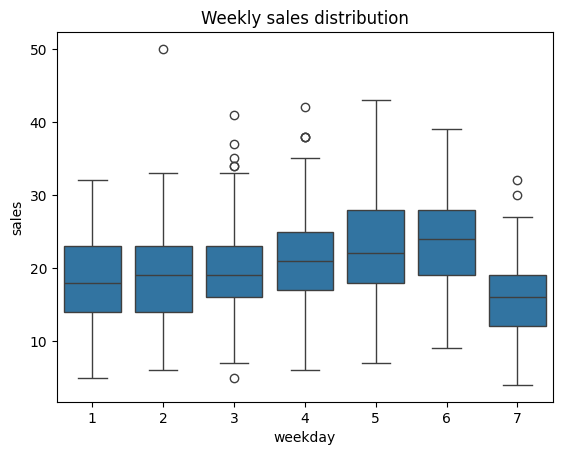

In [21]:
sns.boxplot(x="weekday", y="sales", data=df)
plt.title("Weekly sales distribution")
plt.show()


**Inference:**  The average number of sales increases over the week, is maximum on Saturday (6), and takes a sharp fall on Sunday (7)


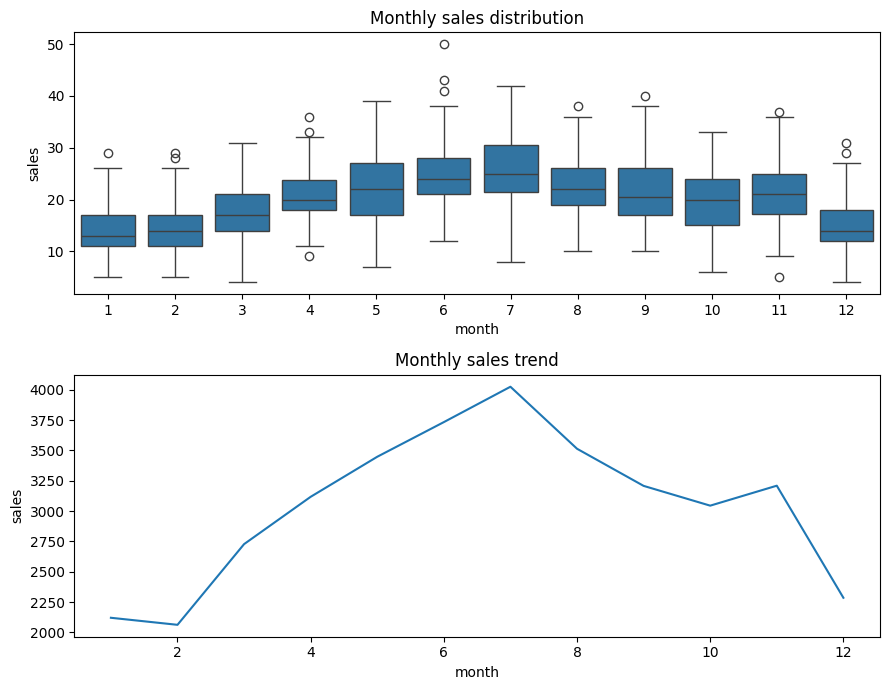

In [22]:
#  we want to plot a boxplot and a line plot
monthly_agg = df.groupby("month")["sales"].sum().reset_index()

fig, axs = plt.subplots(nrows=2, figsize=(9, 7))

# Boxplot
sns.boxplot(x="month", y="sales", data=df, ax=axs[0])
axs[0].set_title("Monthly sales distribution")

# Line plot
sns.lineplot(x="month", y="sales", data=monthly_agg, ax=axs[1])
axs[1].set_title("Monthly sales trend")

plt.tight_layout()  # handy function to use after creating subplots to improve the layout and readability of your plots.

plt.show()


**Inference:**  The number of sales gradually ascends in the first half of the year starting February (2), peaks in July (7), and then gradually descends, before slightly increasing in November (11) and then dropping again in December (12).

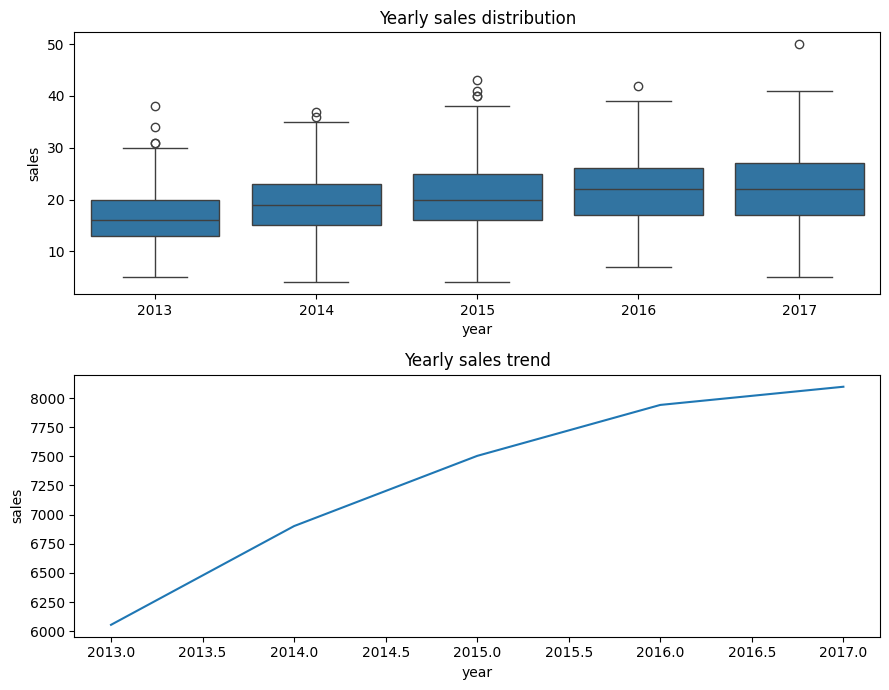

In [23]:
 # we want to plot a boxplot and a line plot
yearly_agg = df.groupby("year")["sales"].sum().reset_index()

fig, axs = plt.subplots(nrows=2, figsize=(9, 7))

# Boxplot
sns.boxplot(x="year", y="sales", data=df, ax=axs[0])
axs[0].set_title("Yearly sales distribution")

# Line plot
sns.lineplot(x="year", y="sales", data=yearly_agg, ax=axs[1])
axs[1].set_title("Yearly sales trend")

plt.tight_layout()
plt.show()


**Inference:**  From the number of sales vs. year plot, we can infer an increasing trend over the years. The aggregate number of sales has increased from approximately 6000 in 2013 to slightly over 8000 in 2017, i.e. a **33.3% increase in the number of sales** approximately. A clear trend is captured by the lineplot above. 

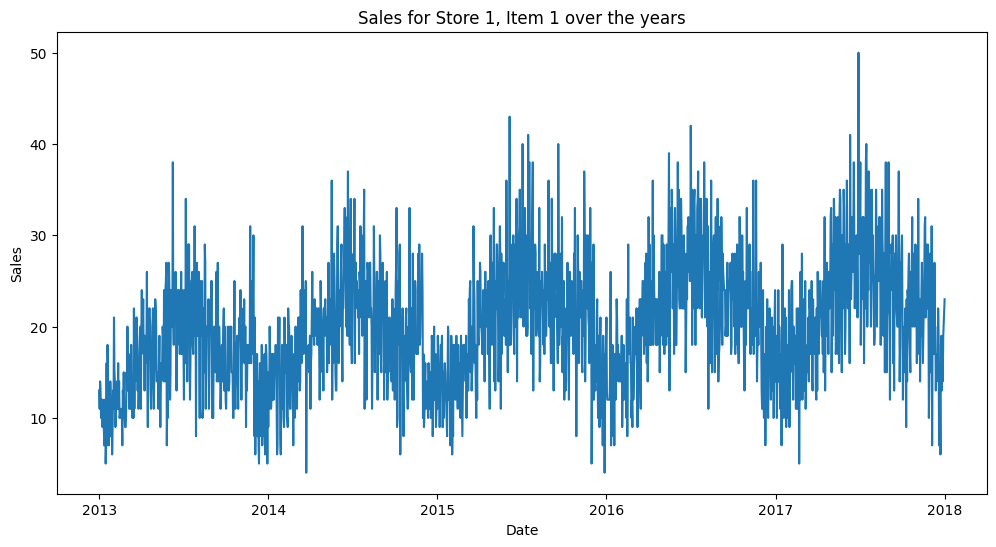

In [24]:
# we want to plot sales over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="sales", data=df)
plt.title("Sales for Store 1, Item 1 over the years")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


**Inference:** There is a seasonal pattern in the number of sales of **item** - 1 at **store** - 1. As also infered in the plot for sales vs. month above, we can see an increase in the sales in the first half of the year, peaking in July, and then a gradual decrease till December. This pattern is repeated each year, 2013 onwards.

### Quantitative Methods to Forecast Product Sales

**It can be fairly concluded from the data exploratory plots above that there is seasonality present in the product sales data, along with a general increase in the number of sales over the years. Therefore, in order to forecast the number of sales for the last three months of 2017, we will keep in mind the linear trend and seasonality present in the product sales**. 


### 1. Baseline Model: Seasonal Naive

Seasonal Naive. It can serve as a quick calculation to get a baseline until something better can come along. Or, perhaps there is very little variance in the data, then this method can be good enough.

**What is Seasonal Naive**?

It is a naive method that takes the seasonal patterns into account by looking at what happened same time last year. For example, if we want to predict the sales during December 2017, the seasonal naive method will assume the same number of sales for December 2017 as was in December 2016. Fortunately, we have at least one-year of sales data, this method might make no sense otherwise.



In [25]:
train_df.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13.0,2013,1,1,1
1,2013-01-02,1,1,11.0,2013,1,2,2
2,2013-01-03,1,1,14.0,2013,1,3,3
3,2013-01-04,1,1,13.0,2013,1,4,4
4,2013-01-05,1,1,10.0,2013,1,5,5


In [26]:
 # Subtracting 1 year from test data:

dates = test_df["date"] - pd.DateOffset(years=1) + pd.Timedelta(days=1)

 * This line calculates new dates by subtracting 1 year from the dates in the 'date' column of the test DataFrame (test_df). It then adds 1 day to ensure that it gets the first day of the month for each year-ago date.

In [27]:
 #  Filtering train_df based on dates from test_df:

seasonal_naive_sales = train_df[train_df["date"].isin(dates)]["sales"]


 * Here, it filters the 'train_df' DataFrame to get sales data for the dates corresponding to the calculated dates in the 'dates' variable. It selects only the 'sales' column.

In [28]:
# Make a copy of the test_df and make naive predictions for the last 3 months of 2017

sn_pred_df = test_df.copy().drop("sales", axis=1)
sn_pred_df["seasonal_naive_sales"] = pd.DataFrame(seasonal_naive_sales).set_index(test_df.index)


 * This part creates a copy of the 'test_df' DataFrame and removes the 'sales' column. Then, it adds a new column named 'seasonal_naive_sales', where it assigns the filtered sales data ('seasonal_naive_sales') to this new column. The indexing is aligned with the original test DataFrame.

In [29]:
sn_pred_df.head()


,date,store,item,year,month,day,weekday,seasonal_naive_sales
0,2017-10-01,1,1,2017,10,1,6,26.0
1,2017-10-02,1,1,2017,10,2,7,20.0
2,2017-10-03,1,1,2017,10,3,1,28.0
3,2017-10-04,1,1,2017,10,4,2,17.0
4,2017-10-05,1,1,2017,10,5,3,22.0


 * The output is a DataFrame (sn_pred_df) that contains the original columns from 'test_df' along with a new column ('seasonal_naive_sales') that holds the predicted sales data based on the seasonal naive forecasting method.

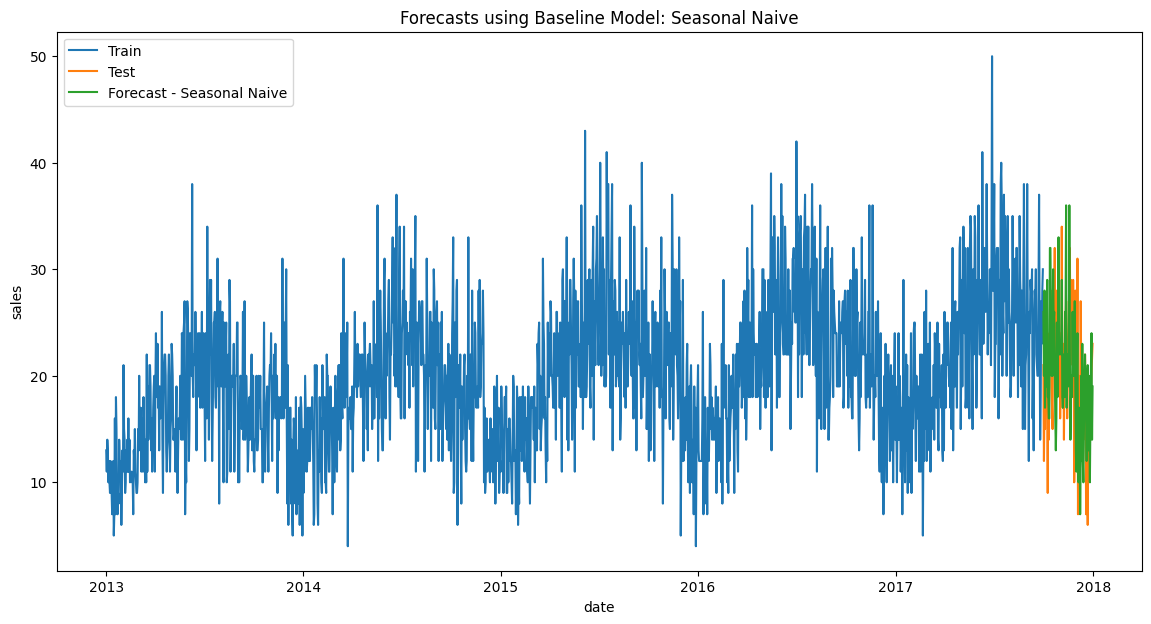

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(train_df["date"], train_df["sales"], label="Train")
plt.plot(test_df["date"], test_df["sales"], label="Test")
plt.plot(sn_pred_df["date"], sn_pred_df["seasonal_naive_sales"], label="Forecast - Seasonal Naive")
plt.legend(loc="best")
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Forecasts using Baseline Model: Seasonal Naive")
plt.show()


**Inference:** To the naked eye, the forecasts seem alright the decreasing trend is clearly captured by our naive method. However, we will formally quantify the performance using forecast accuracy metrics.

**Evaluating the Forecasts**

There are number of widely accepted forecasting metrics, and the most common metric is **forecast error**. The error can simply be calculated by finding the diffrence between the actual sales value and the forecasted sales value. For example, if 10 items are sold on a day, and you predicted 14 items to be sold, you have an error of -4.

In order to evaluate the overall forecast, we will look at metrics like **mean absolute error** (MAE), **root mean squared error** (RMSE) and a percentage error metric - **mean absolute percentage error** (MAPE).

**MAE:** It is the absolute value of the error, summed for each observed day, and divided by the total number of observed days.

**RMSE:** It is similar to MAE, however rather than the absolute value, the error is squared before it is summed, and then the square root is taken to normalize the units. Because we take the square of the error, we wind up punishing large forecasting errors more than small ones.

The above two metrics are scale-dependent meaning that we cannot use them to compare forecasts on different scales. MAPE on the other hand is a scale-independent metric. 

**MAPE:** It can be used for meaningful comparisions, it is calculated by dividing the sum of absolute errors by sum of actual sales to get a percentage indicator that is scaled to the actual sales.

Let's apply the above metrics to our forecasts and see how they compare.

In [31]:
 # Merging and Selecting Data

errors_df = pd.merge(test_df, sn_pred_df, on="date")
errors_df = errors_df[["date", "sales", "seasonal_naive_sales"]]


* This cell merges the test data (test_df) with the predicted data (sn_pred_df) based on the "date" column. Then, it selects only the relevant columns - "date", "sales" (actual sales), and "seasonal_naive_sales" (predicted sales).

In [32]:
# Calculating Errors and Adding Model Name

errors_df["errors"] = test_df["sales"] - sn_pred_df["seasonal_naive_sales"]
errors_df.insert(0, "model", "Seasonal Naive")


* This cell calculates the errors by subtracting the predicted sales from the actual sales. Then, it inserts a new column at the beginning of the DataFrame called "model" and sets all values to "Seasonal Naive", indicating the name of the forecasting model used.

In [33]:
# Error Metrics Functions

def mae(err):
    return np.mean(np.abs(err))

def rmse(err):
    return np.sqrt(np.mean(err ** 2))

def mape(err, sales=errors_df["sales"]):
    return np.sum(np.abs(err))/np.sum(sales) * 100


### This cell defines three functions:

* mae: Calculates the Mean Absolute Error.
* rmse: Calculates the Root Mean Square Error.
* mape: Calculates the Mean Absolute Percentage Error, optionally taking the actual sales data as input.

In [34]:
 # Aggregating Error Metrics

result_df = errors_df.groupby("model").agg(total_sales=("sales", "sum"),
                                           total_sn_pred_sales=("seasonal_naive_sales", "sum"),
                                           overall_error=("errors", "sum"),
                                           MAE=("errors", mae), 
                                           RMSE=("errors", rmse), 
                                           MAPE=("errors", mape))


* This cell aggregates error metrics for the "Seasonal Naive" model using groupby and agg functions. It calculates the total sales, total predicted sales, overall error, MAE, RMSE, and MAPE for the model and stores the results in a DataFrame named result_df.

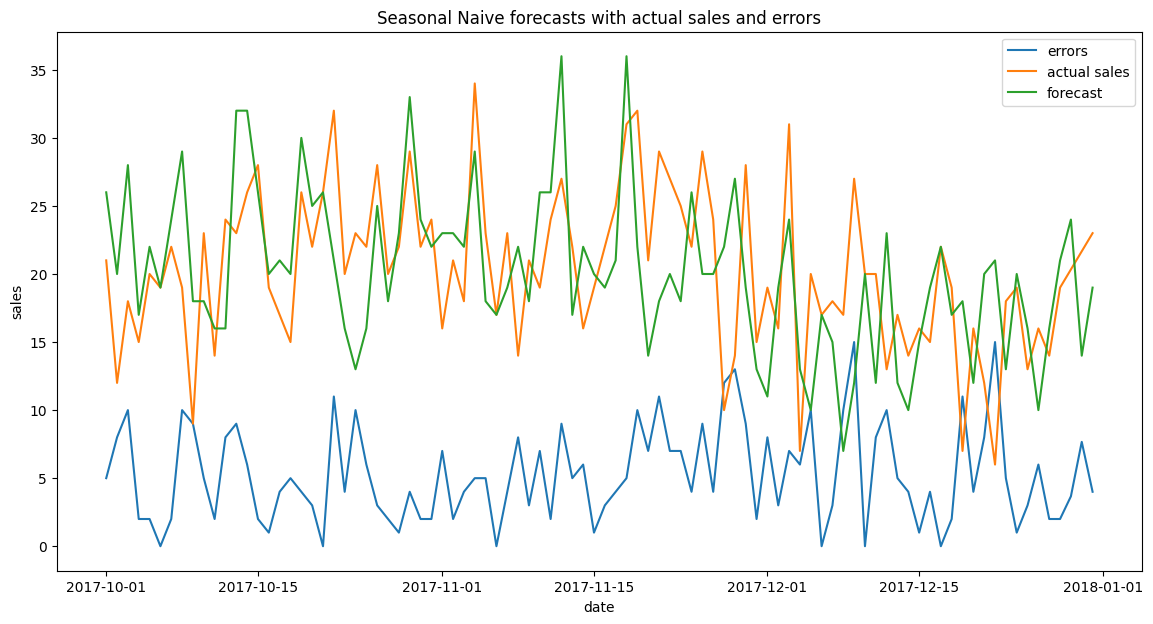

,total_sales,total_sn_pred_sales,overall_error,MAE,RMSE,MAPE
model,,,,,,
Seasonal Naive,1861.0,1851.0,10.0,5.275362,6.357315,26.079169


In [35]:
plt.figure(figsize=(14,7))
plt.plot(errors_df["date"], np.abs(errors_df["errors"]), label="errors")
plt.plot(errors_df["date"], errors_df["sales"], label="actual sales")
plt.plot(errors_df["date"], errors_df["seasonal_naive_sales"], label="forecast")
plt.legend(loc="best")
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Seasonal Naive forecasts with actual sales and errors")
plt.show()

result_df

The overall error is not as bad, and we were able to achieve a **MAPE of 26.07%**. We will use this as a **benchmark** to judge the forecast performance of the other models. Let's move on to a more advanced model that uses Exponential Smoothing, but before that let's take a look at the time series decomposition plot for our training data.

### Time Series Decomposition Plot

* A time series decomposition plot allows us to observe the seasonality, trend, and error/remainder terms
of a time series. These three components are a crucial part of the Exponential Smoothing models. Therfore, the decomposition plot helps in deciding the type of Exponential Smoothing Model to use for our forecasts.

In [36]:
ts_decomp_df = train_df.set_index("date") # set date as index
ts_decomp_df["sales"] = ts_decomp_df["sales"].astype(float)
ts_decomp_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


<Figure size 640x480 with 0 Axes>

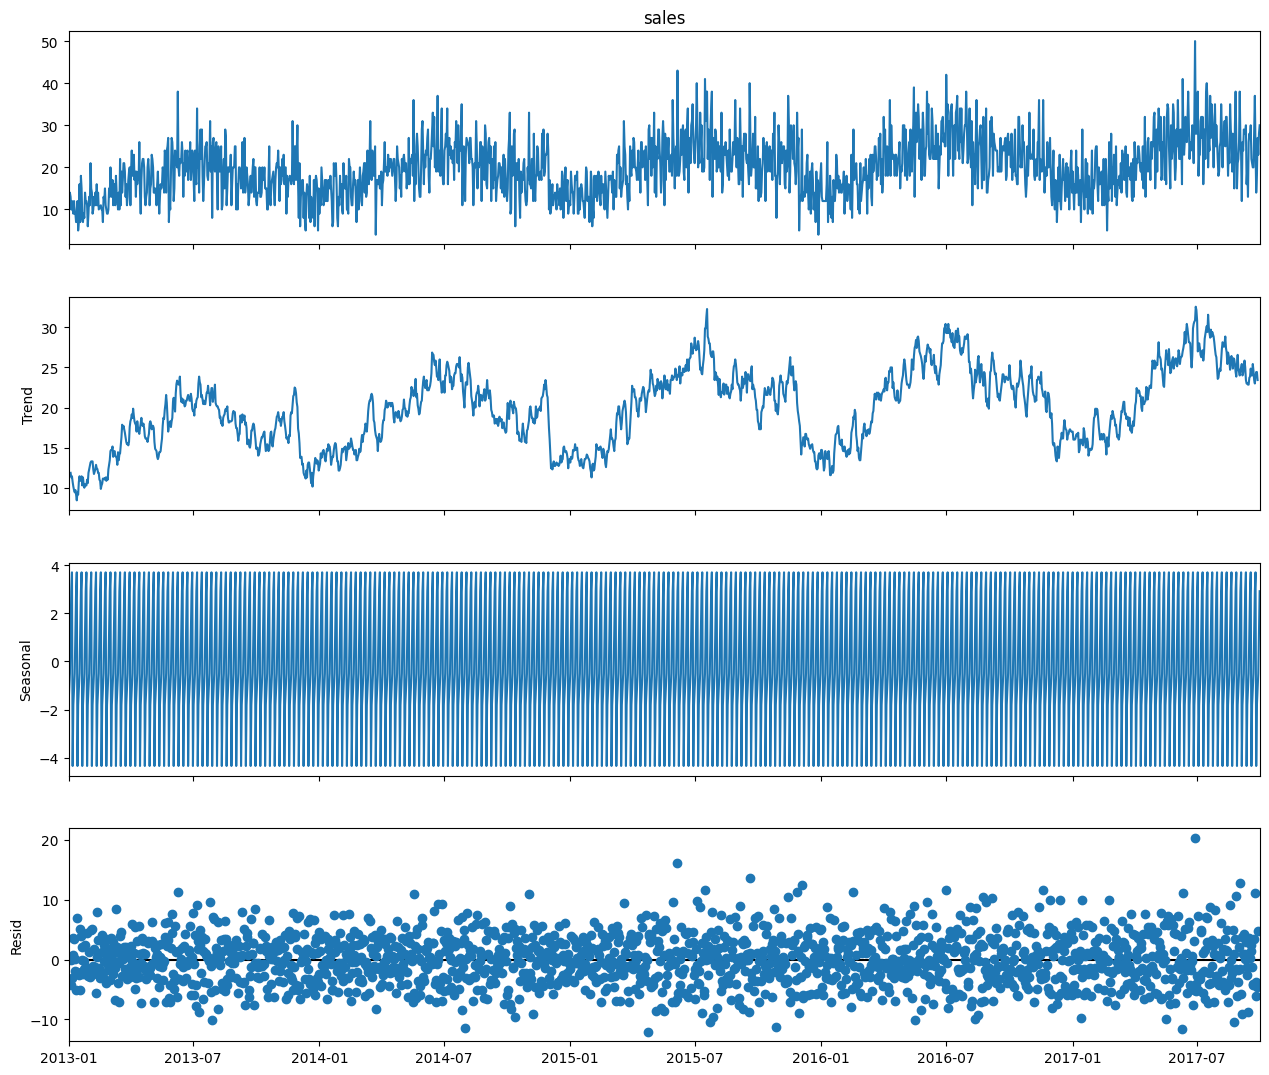

In [37]:
# Infer the frequency of the data
result = seasonal_decompose(ts_decomp_df["sales"], model="additive")
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 12)



### Determine Error, Trend and Seasonality

An ETS model has three main components: error, trend, and seasonality. Each can be applied either additively, multiplicatively, or not at all. We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the thre components.

1. Trend - If the trend plot is linear then we apply it additively (A). If the trend line grows or shrinks exponentially, we apply it multiplicatively (M). If there is no clear trend, no trend component is included (N).

2. Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply it multiplicatively (M). If there is no seasonality, it is not applied (N).

3. Error - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply it additively (A). If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

**For our sales data, we see a linear trend plot and a constant seasonality over time, so we will apply trend and seasonality additively. The error component also has constant variance, so we will apply it additively too**.

**We will use a Exponential Smoothing, a commonly-used local statistical algorithm for time-series forecasting. The Exponential Smoothing method can be defined in terms of an ETS framework, in which the components are calculated using a smoothing technique**.

### 2. Autoregressive Integrated Moving Average - ARIMA Model

Trend Elements
There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

Note: ARIMA model doesn't have the seasonal element (it's in SARIMA)

#### Step 1: Check stationarity

Before going any further into our analysis, our series has to be made stationary.

Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). If the mean of a time-series increases over time, then it’s not stationary. 

The mean across many time periods is only informative if the expected value is the same across those time periods. If these population parameters can vary, what are we really estimating by taking an average across time?

Stationarity requires that the statistical properties must be the same across time, making the sample average a reasonable way to estimate them.

**Methods to Check Stationarity**

1. **Plotting rolling statistics:** Plotting rolling means and variances is a first good way to visually inspect our series. If the rolling statistics exhibit a clear trend (upwards or downwards) and show varying variance (increasing or decreasing amplitude), then you might conclude that the series is very likely not to be stationary.



2. **Augmented Dickey-Fuller Test:** This test is used to assess whether or not a time-series is stationary. It gives a result called a “test-statistic”, based on which you can say, with different levels (or percentage) of confidence, if the time-series is stationary or not. The **test statistic** is expected to be negative; therefore, it has to be more **negative(less)** than the **critical value** for the **hypothesis to be rejected** and conclude that **series is stationary**.



3. **ACF and PACF plots:** An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself. A partial autocorrelation (PACF) plot represents the amount of correlation between a series and a lag of itself that is not explained by correlations at all lower-order lags. 
Ideally, we want no correlation between the series and lags of itself. Graphically speaking, we would like all the spikes to fall in the blue region.

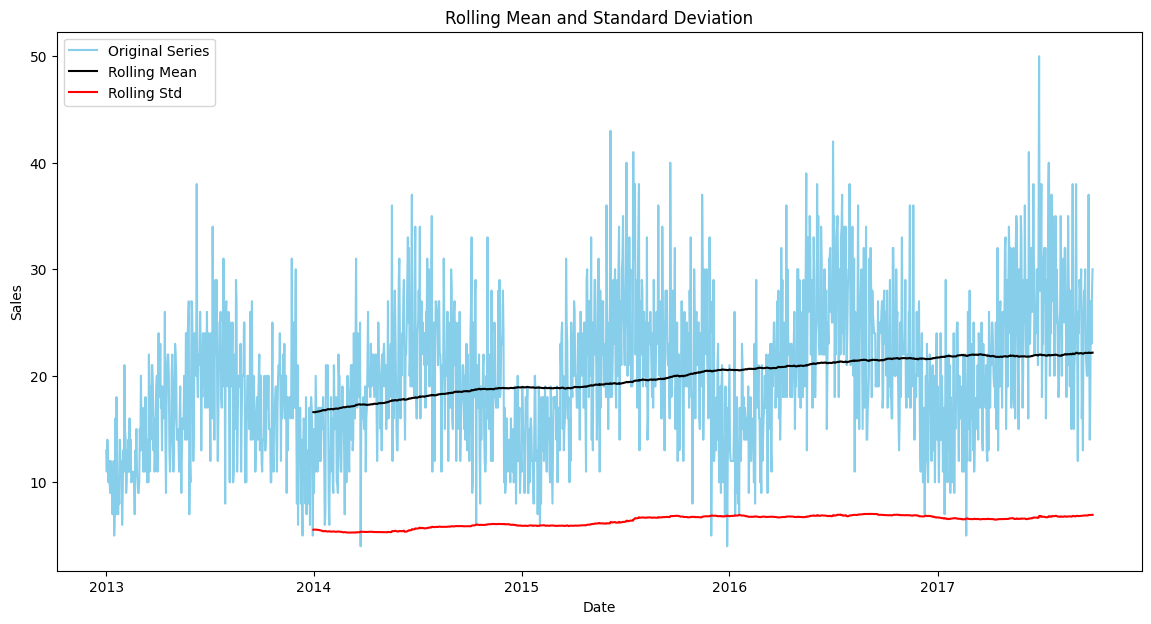

Augmented Dickey-Fuller Test Results:
Test statistic = -3.066
P-value = 0.029
Critical values:
	1%: -3.4341843999399573 - The data is not stationary with 99% confidence
	5%: -2.8632336725104834 - The data is  stationary with 95% confidence
	10%: -2.567671665464627 - The data is  stationary with 90% confidence


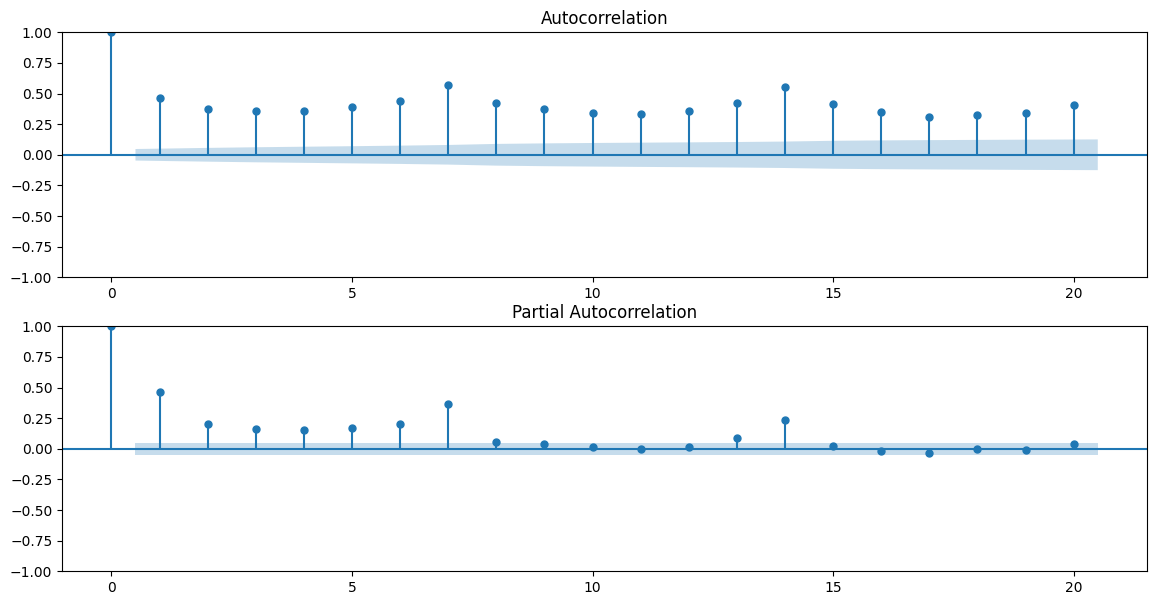

In [38]:
arima_df = train_df[["date", "sales"]].set_index("date")
arima_test_df = test_df[["date", "sales"]].set_index("date")

def test_stationarity(timeseries):
    # Plotting rolling statistics
    rollmean = timeseries.rolling(window=365).mean()
    rollstd = timeseries.rolling(window=365).std()

    plt.figure(figsize=(14, 7))
    plt.plot(timeseries, color="skyblue", label="Original Series")
    plt.plot(rollmean, color="black", label="Rolling Mean")
    plt.plot(rollstd, color="red", label="Rolling Std")
    
    plt.legend(loc="best")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show()
    
    # Augmented Dickey-Fuller Test
    adfuller_test = adfuller(timeseries, autolag="AIC")
    print("Augmented Dickey-Fuller Test Results:")
    print("Test statistic = {:.3f}".format(adfuller_test[0]))
    print("P-value = {:.3f}".format(adfuller_test[1]))
    print("Critical values:")
    
    for key, value in adfuller_test[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence"
              .format(key, value, "" if adfuller_test[0] < value else "not", 100-int(key[:-1])))
        
    # Autocorrelation Plots
    fig, ax = plt.subplots(2, figsize=(14,7))
    ax[0] = plot_acf(timeseries, ax=ax[0], lags=20)
    ax[1] = plot_pacf(timeseries, ax=ax[1], lags=20)
    
test_stationarity(arima_df.sales)


Looking at the results from our test, we can conclude that the series is not stationary. Therefore, in order to make the series stationary we apply <b> Differencing </b>

#### Step 2: Differencing

<b>Differencing:</b> Seasonal or cyclical patterns can be removed by substracting periodical values. If the data is 12-month seasonal, substracting the series with a 12-lag difference series will give a “flatter” series. Since we have aggregated the data to each day-level, we will shift by 1.

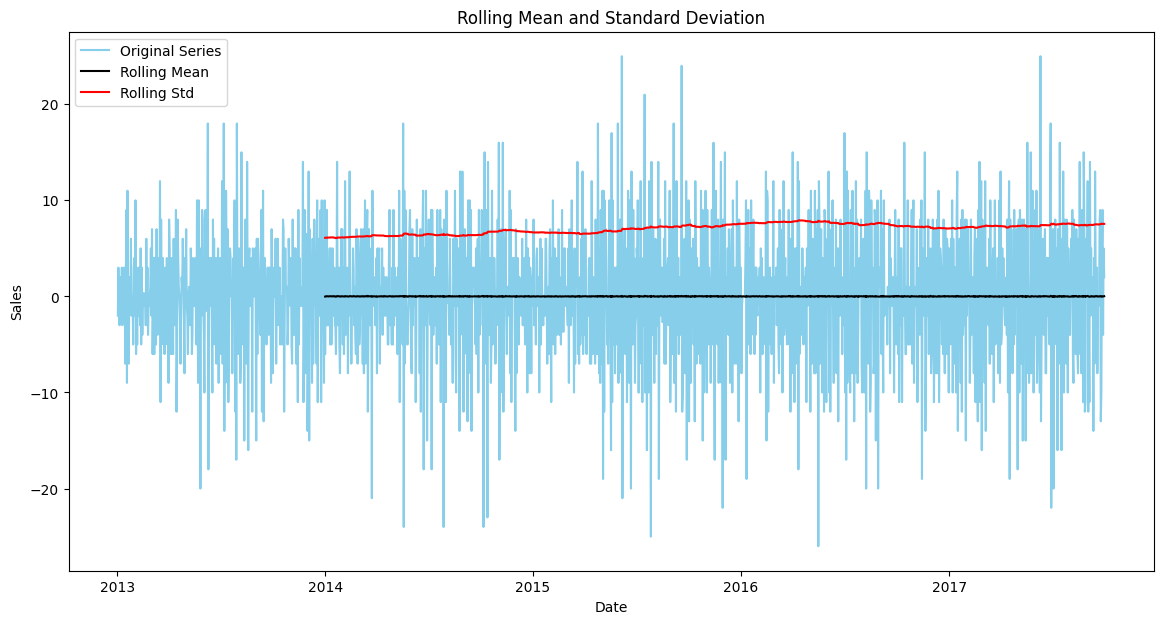

Augmented Dickey-Fuller Test Results:
Test statistic = -12.305
P-value = 0.000
Critical values:
	1%: -3.434179908502461 - The data is  stationary with 99% confidence
	5%: -2.863231689892687 - The data is  stationary with 95% confidence
	10%: -2.567670609760268 - The data is  stationary with 90% confidence


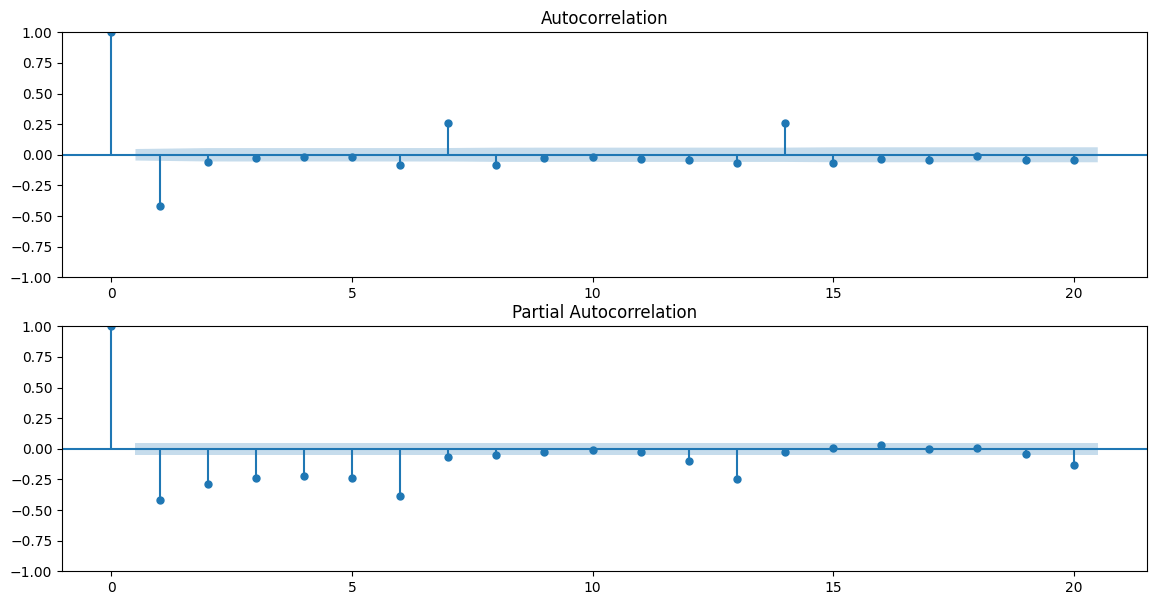

In [39]:
first_difference = arima_df.sales - arima_df.sales.shift(1)
first_difference = pd.DataFrame(first_difference.dropna(inplace=False))
# Check for stationarity after differencing
test_stationarity(first_difference.sales)

After applying Differencing to the series, we can see from the above results that the series is now stationary, i.e. mean and variance are constant over time, and from ADF we can verify that the test-statistic is lesser than the critical value, hence we can reject the null hypothesis and conclude that the series is staionary.

#### Step 3: Model Building
#### Interpreting the AR(p), I(d), MA(q) values:

1. **Determining I(d):**

    Taking the first order difference makes the time series stationary. Therefore, **I(d) = 1**.
    

2. **Determining AR(p):** If the lag-1 autocorrelation of the differenced series PACF is negative, and/or there is a sharp cutoff, then choose a AR order of 1.

    From the PACF plot we can clearly observe that within 6 lags the AR is significant. Therefore, we can use **AR(p) = 6**,  (6 lines are crossed the blue lines so 6past days are required to predict).


3. **Determining MA(q):** If the lag-1 autocorrelation of the differenced series ACF is negative, and/or there is a sharp cutoff, then choose a MA order of 1.

    From tha ACF plot we see a negative spike at lag 1, therfore we can use **MA(q) = 1**

In [40]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(arima_df["sales"], order=(6, 1, 1))
arima_fit = arima_model.fit()

print(arima_fit.summary())




C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1734
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -5303.393
Date:                Sun, 19 May 2024   AIC                          10622.787
Time:                        18:44:05   BIC                          10666.448
Sample:                    01-01-2013   HQIC                         10638.935
                         - 09-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6076      0.052    -11.758      0.000      -0.709      -0.506
ar.L2         -0.6030      0.041    -14.780      0.000      -0.683      -0.523
ar.L3         -0.5646      0.037    -15.134      0.0

### Plotting the residuals using ACF and PACF

Plotting the residuals shows that recurring correlation exists in both ACF and PACF. So we need to deal with seasonality. When the plots of ACF and PACF are similar or any sesaonality is present between them then, we need to apply the Seasonal ARIMA (SARIMA) model.

C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


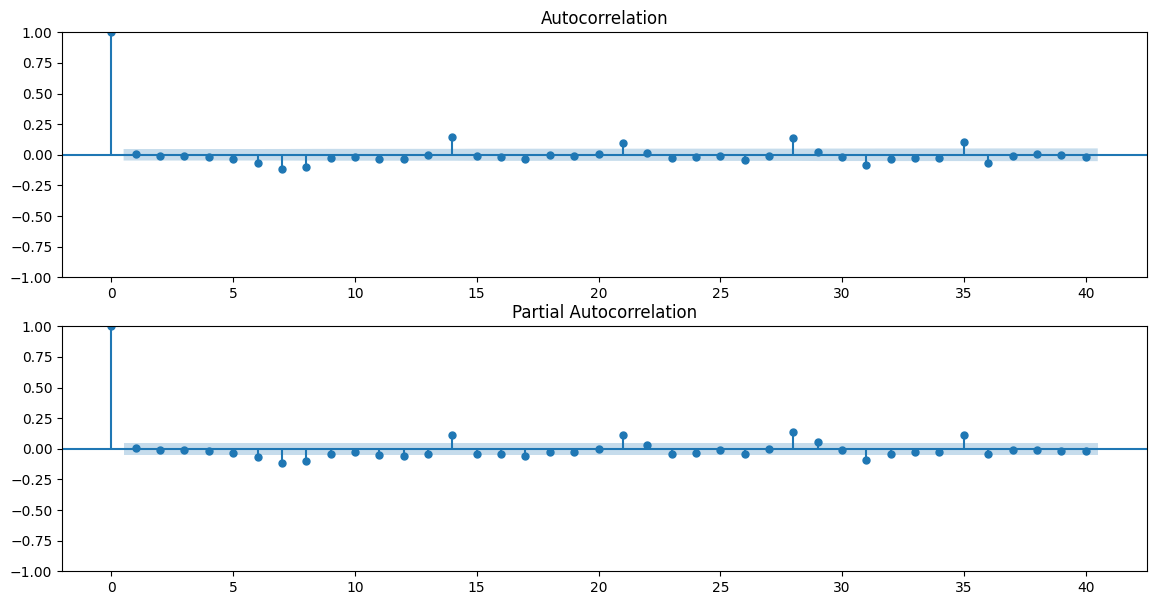

In [41]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

arima_model = ARIMA(arima_df["sales"], order=(6, 1, 1))
arima_fit = arima_model.fit()

residuals = arima_fit.resid

# Checking for seasonality
fig, ax = plt.subplots(2, figsize=(14,7))
ax[0] = plot_acf(residuals, ax=ax[0], lags=40)
ax[1] = plot_pacf(residuals, ax=ax[1], lags=40)


Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

SARIMA is Seasonal ARIMA, or simply put, ARIMA with a seasonal component

The parameters for these types of models are as follows:

* p and seasonal P: indicate the number of AR terms (lags of the stationary series)
* d and seasonal D: indicate differencing that must be done to stationary series
* q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)

It involves the following steps –
* Plot the series – to check for outliers
* Transform the data (to make mean and variance constant)
* Apply statistical tests to check if the series is stationary (Both trend and seasonality)
* If non-stationary (has either trend or seasonality), make it stationary by differencing
* Plot ACF of stationary series for MA order, Seasonal MA order at seasonal spikes
* Plot PACF of stationary series for AR order, Seasonal AR order at seasonal spikes
* Run SARIMA with those parameters
* Check for model validity using residual plots

In [42]:
# fit the model
sarima_model = SARIMAX(arima_df.sales, order=(6, 1, 0), seasonal_order=(6, 1, 0, 7), 
                       enforce_invertibility=False, enforce_stationarity=False)

C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AAYUB SAYYAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [43]:
sarima_fit = sarima_model.fit()


In [44]:
arima_test_df["pred_sales"] = sarima_fit.predict(start=arima_test_df.index[0],
                                                 end=arima_test_df.index[-1], dynamic= True)


In [45]:
arima_test_df["pred_sales"]

date
2017-10-01    25.995310
2017-10-02    16.075631
2017-10-03    20.620536
2017-10-04    21.042958
2017-10-05    21.280234
                ...    
2017-12-27    17.281240
2017-12-28    18.812630
2017-12-29    24.601661
2017-12-30    26.167166
2017-12-31    21.850318
Name: pred_sales, Length: 92, dtype: float64

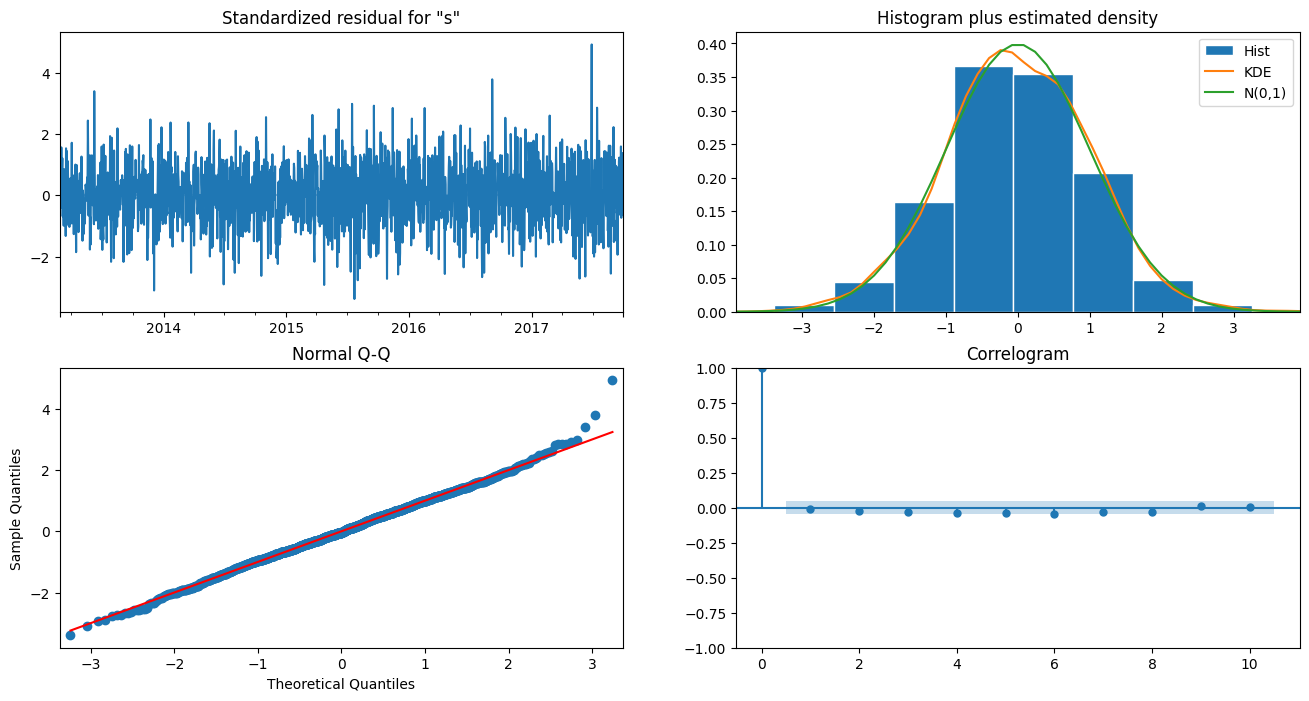

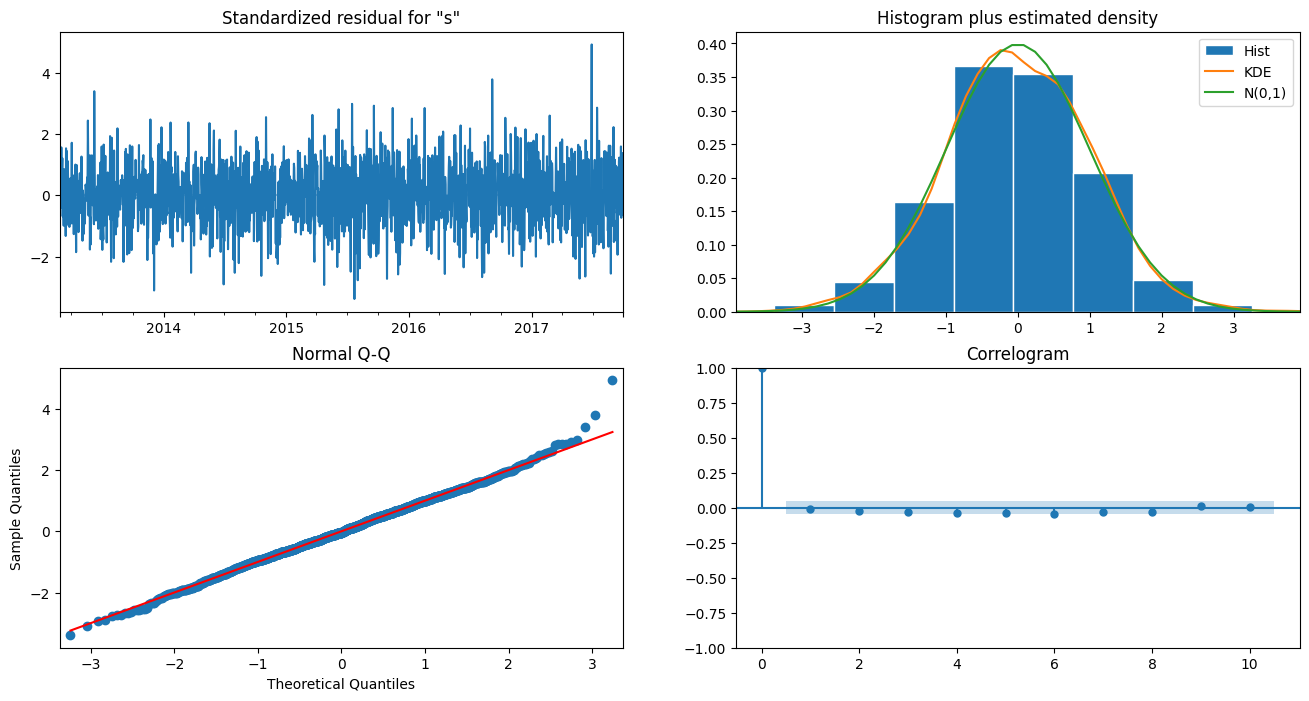

In [46]:
sarima_fit.plot_diagnostics(figsize=(16,8))

In [47]:
# Calculate errors and add model column
arima_test_df["errors"] = arima_test_df.sales - arima_test_df.pred_sales
arima_test_df.insert(0, "model", "SARIMA")


Calculate the prediction errors by subtracting the predicted sales (pred_sales) from the actual sales (sales) and store the result in a new column called errors.
Insert a new column at the beginning of the DataFrame to indicate the model used, which is "SARIMA" in this case.

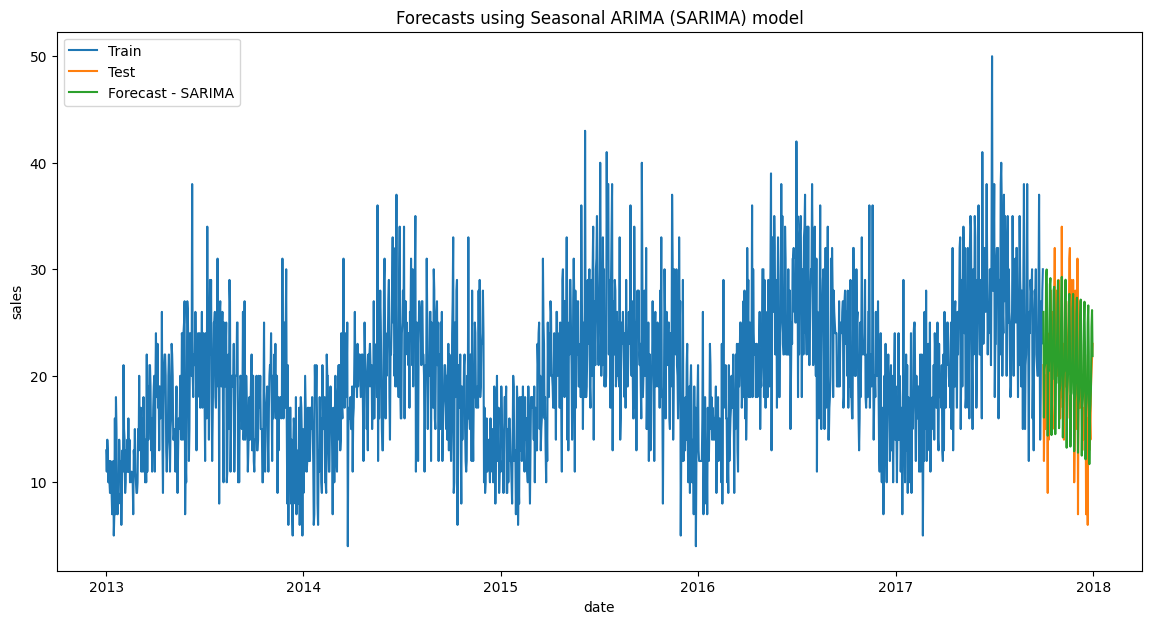

In [48]:
# Plot forecasts
plt.figure(figsize=(14,7))
plt.plot(train_df["date"], train_df["sales"], label="Train")
plt.plot(arima_test_df.index, arima_test_df["sales"], label="Test")
plt.plot(arima_test_df.index, arima_test_df["pred_sales"], label="Forecast - SARIMA")
plt.legend(loc="best")
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Forecasts using Seasonal ARIMA (SARIMA) model")
plt.show()


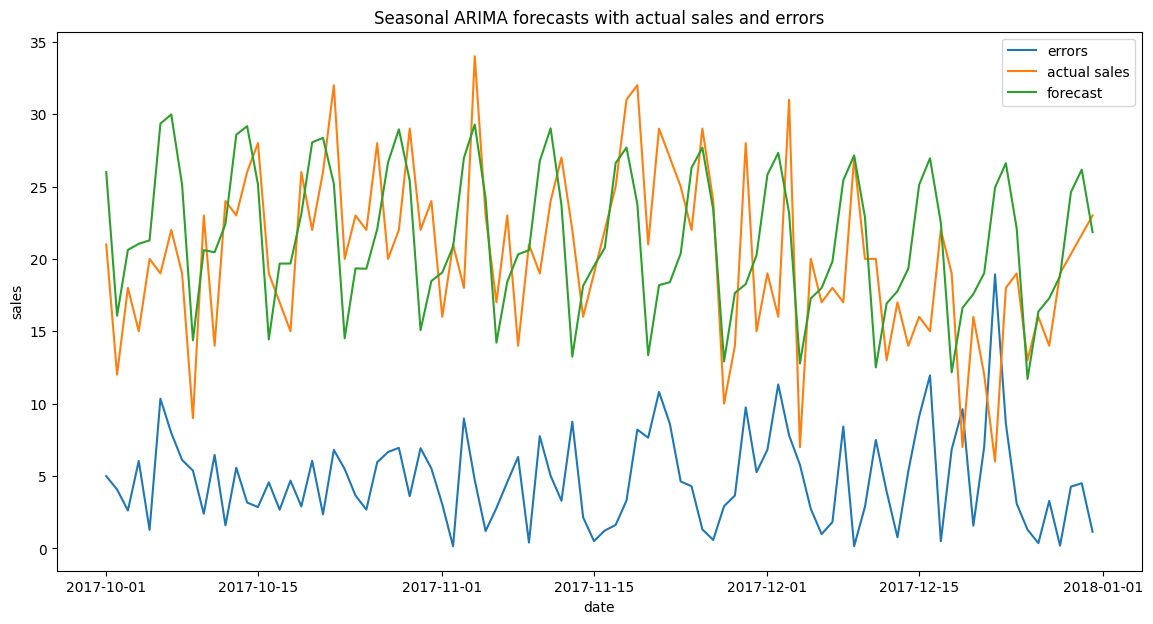

In [49]:
# Plot errors
plt.figure(figsize=(14,7))
plt.plot(arima_test_df.index, np.abs(arima_test_df["errors"]), label="errors")
plt.plot(arima_test_df.index, arima_test_df["sales"], label="actual sales")
plt.plot(arima_test_df.index, arima_test_df["pred_sales"], label="forecast")
plt.legend(loc="best")
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Seasonal ARIMA forecasts with actual sales and errors")
plt.show()


In [50]:
# Define evaluation metrics
def mae(errors):
    return np.mean(np.abs(errors))

def rmse(errors):
    return np.sqrt(np.mean(errors ** 2))

def mape(errors, actual):
    return np.mean(np.abs(errors / actual)) * 100

# Summarize evaluation metrics
result_df_sarima = arima_test_df.groupby("model").agg(total_sales=("sales", "sum"),
                                                      total_pred_sales=("pred_sales", "sum"),
                                                      SARIMA_overall_error=("errors", "sum"),
                                                      MAE=("errors", mae),
                                                      RMSE=("errors", rmse), 
                                                      MAPE=("errors", lambda x: mape(x, arima_test_df["sales"])))
result_df_sarima


,total_sales,total_pred_sales,SARIMA_overall_error,MAE,RMSE,MAPE
model,,,,,,
SARIMA,1861.0,1974.962825,-113.962825,4.787398,5.796378,28.791019


**Inference:** The SARIMA model with **MAPE of 28.8%** performed better than our baseline model.



#### Summary of Evaluation Metrics for SARIMA Model:
| model | total_sales | total_pred_sales | SARIMA_overall_error | MAE     | RMSE    | MAPE     |
|-------|--------------|------------------|----------------------|---------|---------|----------|
| SARIMA| 1861.0       | 1974.962825      | -113.962825          | 4.787398| 5.796378| 28.791019|

#### Summary of Evaluation Metrics for Seasonal Naive Model:
| model           | total_sales | total_sn_pred_sales | overall_error | MAE     | RMSE    | MAPE     |
|-----------------|--------------|---------------------|----------------|---------|---------|----------|
| Seasonal Naive  | 1861.0       | 1851.0              | 10.0           | 5.275362| 6.357315| 26.079169|




1. **SARIMA Model Evaluation:**
   - Total Sales: 1861.0
   - Total Predicted Sales by SARIMA Model: 1974.96
   - SARIMA Overall Error: -113.96 (indicating an underestimation by the model)
   - Mean Absolute Error (MAE): 4.79
   - Root Mean Squared Error (RMSE): 5.80
   - Mean Absolute Percentage Error (MAPE): 28.8%

2. **Seasonal Naive Model Evaluation:**
   - Total Sales: 1861.0
   - Total Predicted Sales by Seasonal Naive Model: 1851.0
   - Overall Error of Seasonal Naive Model: 10.0
   - Mean Absolute Error (MAE): 5.28
   - Root Mean Squared Error (RMSE): 6.36
   - Mean Absolute Percentage Error (MAPE): 26.03%



**Conclusions:**
- Both models were evaluated against the same test data with a total sales volume of 1861.0 units.
- The SARIMA model predicted a higher total sales volume (1974.96 units) compared to the actual sales, indicating a tendency to overestimate.
- The Seasonal Naive model, on the other hand, predicted a total sales volume closer to the actual sales (1851.0 units).
- Despite the SARIMA model having a lower MAE and RMSE compared to the Seasonal Naive model, the Seasonal Naive model had a slightly lower MAPE, suggesting that it may provide more accurate predictions on a percentage basis.
- Further analysis and comparison of the models' performance on different datasets and over longer time periods would be beneficial for a more comprehensive evaluation.

**Overall Performance**:
   - While the SARIMA model has lower MAE and RMSE, indicating it performed better in terms of average and large errors, its MAPE is higher, suggesting it was less accurate in percentage terms relative to the actual sales.
   - The Seasonal Naive model's predictions were very close to the actual total sales and had a slightly better MAPE, showing it performed well for this dataset despite being a simpler model.


### Final Thoughts:
- **SARIMA Model**: Good at minimizing average and large errors but needs improvement in terms of percentage accuracy.
- **Seasonal Naive Model**: Simple but effective, providing very close predictions to the actual sales with slightly higher average and large errors compared to SARIMA.
